In [35]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [36]:
train = pd.read_csv('../input/Train.csv')
test = pd.read_csv('../input/Test.csv')

In [37]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [38]:
test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.021804,-0.012806,-0.010988,-0.034864,0.031016,2.988897
std,0.979163,1.021580,1.041857,1.034507,0.937469,114.139329
min,-2.564288,-2.992849,-2.767818,-3.041550,-2.493446,-320.048473
25%,-0.784581,-0.640843,-0.780267,-0.730596,-0.589199,-65.763521
50%,-0.004759,-0.077186,-0.109300,-0.040752,0.047327,0.699553
75%,0.681777,0.738286,0.754063,0.656363,0.586405,83.257690
max,3.244870,2.591723,2.909357,2.662180,2.870382,335.497450


In [39]:
train.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [40]:
test.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

### So we got cleaned data

All are contineous

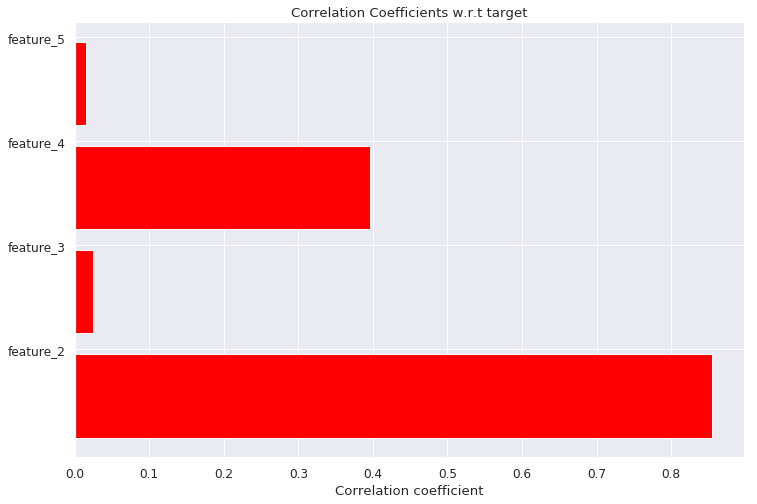

In [41]:
#plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.target.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t target");

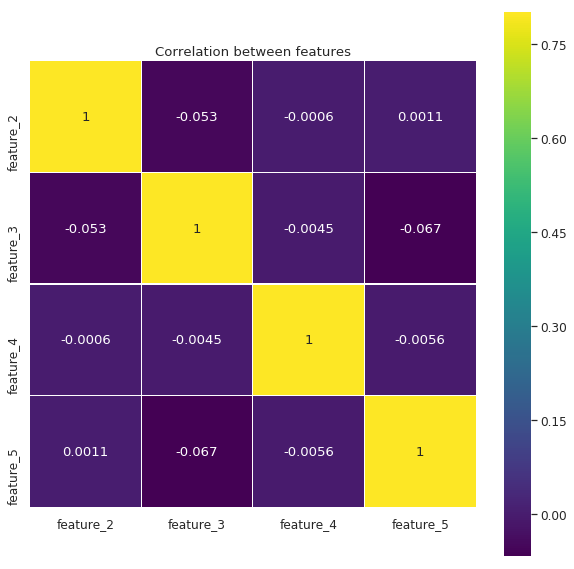

In [42]:
#Heatmap
corrMatrix=train[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

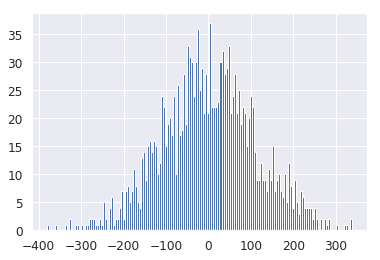

In [43]:
plt.hist((train.target),bins=152)
plt.show()

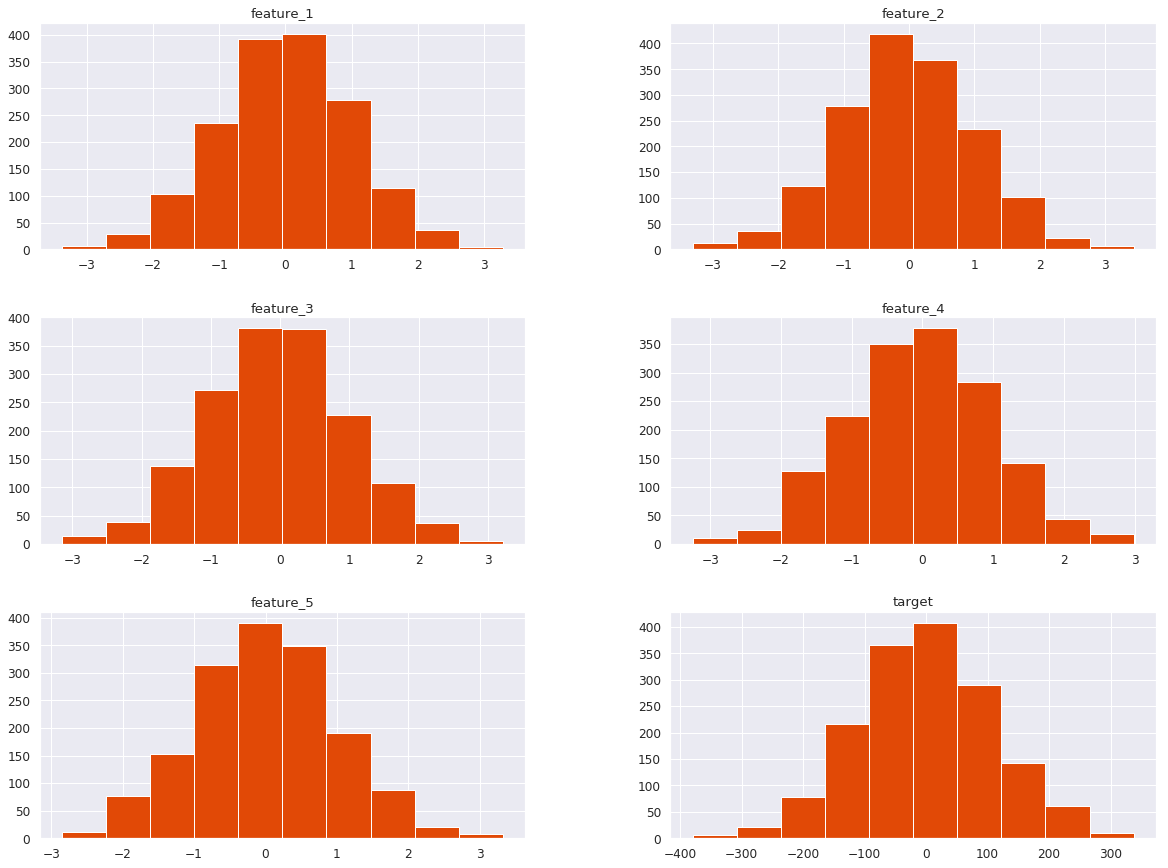

In [44]:
# Let's see how the numeric data is distributed.

train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

# Linear Regression 

By merging train.csv and test.csv data and then splitting in 80:20 ratio

then creating model

and calculating score

In [45]:
combined = train.append(test)
combined.reset_index(inplace=True)


In [46]:
combined.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808,0.852848
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356,111.405622
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389,-70.173508
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115,-0.466188
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205,73.638671
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [47]:
y = combined['target']
x = combined.drop('target', axis=1)

In [48]:
y.describe()

count    2000.000000
mean        0.852848
std       111.405622
min      -379.829794
25%       -70.173508
50%        -0.466188
75%        73.638671
max       337.643014
Name: target, dtype: float64

In [49]:
x.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770


### Splitting into 80:20

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


In [52]:
# Implimenting Linear Regression from inbuilt function of sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(X_train,y_train)
predict = model.predict(X_test)

In [53]:
#Predicting Score
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.9652127286274143


In [54]:
print("Training Score %.4f"%reg.score(X_train,y_train))
print("Testing Score %.4f"%reg.score(X_test,y_test))

Training Score 0.9671
Testing Score 0.9652


# Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='r2')

In [57]:
print(scores)

[0.95118744 0.97023156 0.96893999 0.97022401 0.96747965 0.96499972
 0.96262807 0.97345875 0.96189059 0.97082937]


In [58]:
print(scores.mean())

0.9661869144789648


In [59]:
print(scores.std())

0.006114384976666032


### Calculating loss


In [60]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [61]:
print(scores)

[-502.96271789 -374.74049281 -414.4742272  -382.03044179 -369.39705744
 -437.78949987 -428.51527148 -373.25915899 -479.10820038 -401.19350582]


In [62]:
#Average loss
print(scores.mean())

-416.3470573669724


In [63]:
print(scores.std())

43.876897009552344


## Linear Regression fit

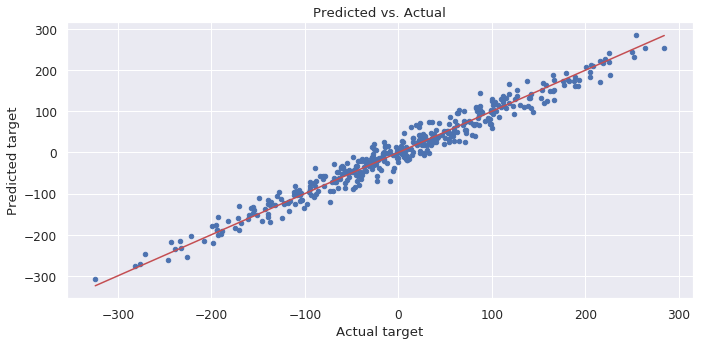

In [64]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r')
plt.tight_layout()

### Predicted Values

In [65]:
y_pred.shape

(400,)

In [66]:
print("predicted values for 400 test data are", y_pred)

predicted values for 400 test data are [ 1.42596695e+02 -1.36798726e+02  2.53874297e+02  1.53526664e+01
 -8.23412457e+01  1.52351118e+02  7.70398118e+01  9.28501220e+01
 -1.24403704e+02  1.92325679e+02  1.28779153e+00 -1.67873817e+01
 -6.33285463e+01  2.10845314e+02  1.16133273e+02 -5.83791099e+00
 -1.88330079e+02 -1.49203788e+02 -1.60201956e+02  2.49612506e+01
 -1.15048167e+02  4.27967738e+01 -1.72118379e+00  4.04879450e+01
  7.52626640e+01  2.22958149e+02 -1.58074655e+02  5.91045195e+01
 -3.35768509e+00  8.39404130e+01  1.09823830e+02 -1.25782606e+02
  1.60730559e+02 -4.29231282e+01 -1.26587157e+02 -3.89775486e+01
  1.07785007e+02  2.96474241e+01 -4.17106104e+01 -2.81778032e+01
  4.23722446e+01  2.20776059e+02 -3.34901856e+00  4.03815851e+01
  3.25636505e+01  1.70495898e+02 -2.62611460e+01 -7.08262146e+00
  1.50863399e+02 -1.67943606e+02 -1.02956610e+02  1.27690751e+02
  2.64032599e+01 -1.90250672e+02  1.61180423e+02 -1.97133433e+01
 -5.77731859e+01  1.19987121e+02  1.29430763e+02  3

In [67]:
np.savetxt('predictedres.csv',y_pred)